# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования
Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Описание данных:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

План работы:

* изучить общую информацию о данных;
* предобработка данных (удаление пропусков, обработка аномальных значений, изменение типов данных, обработка дубликатов, категоризация данных);
* исследование данных.


### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # прочитала csv-файл

In [3]:
data.info() # вывела основную информацию о датафрейме
data.head(10) #вывела на экран первые 10 строк data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


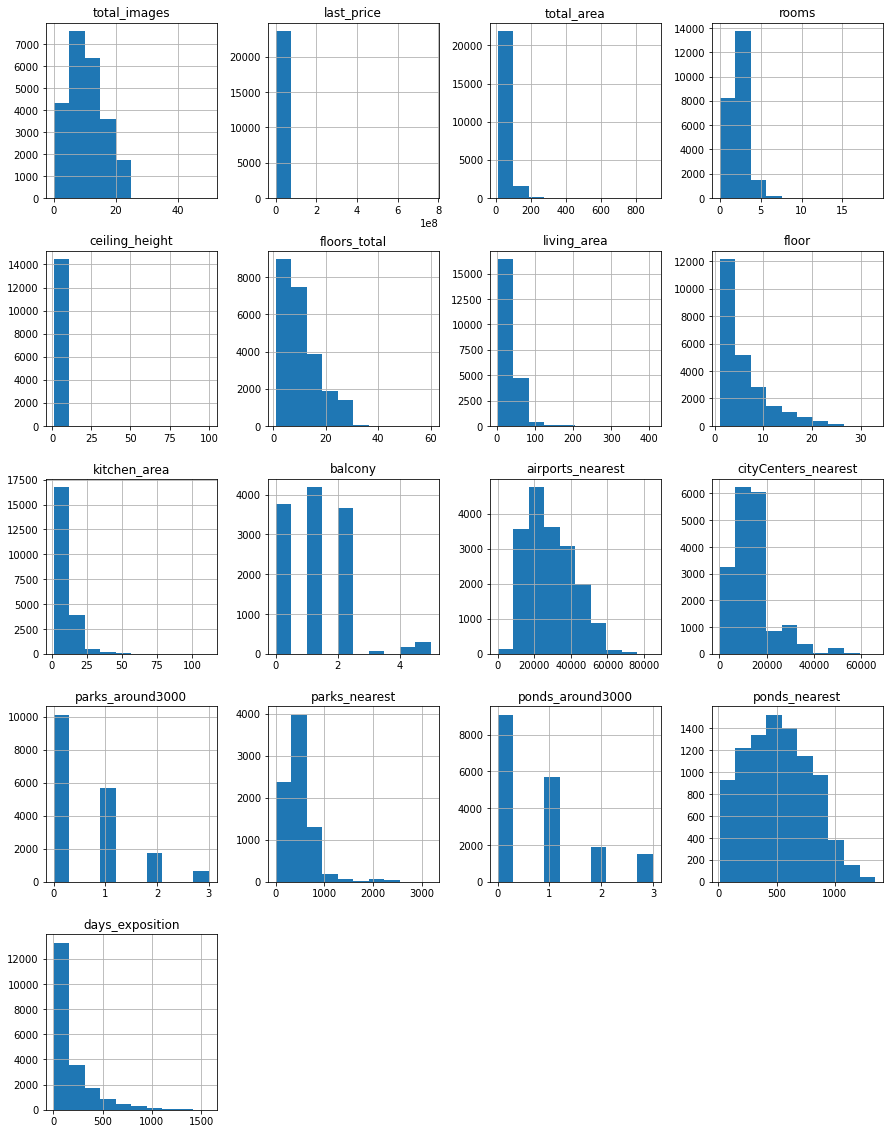

In [5]:
data.hist(figsize=(15, 20)); #Построила общую гистограмму для всех числовых столбцов таблицы

Гистограммы просмотрела, явных аномалий, выбросов не вижу.

### Предобработка данных

**Обработка пропущенных значений**

In [6]:
data.isna().sum() #проверяю в каких столбцах есть пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Найдены пропуски в данных столбцов: living_area, is_apartment, kitchen_area, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

In [7]:
data['balcony'] = data['balcony'].fillna(0) #заполняю пропуски в столбце balcony нулем
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбце 'balcony' заменила на ноль, скорее всего число балконов не указали, потому что их нет в квартире. Но среднее значение было бы не логично заменять эти пропуски, потому что в квартире может и не быть балкона.

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(value = data['ceiling_height'].median()) #заменяю пропущенные значения в столбце ceiling_height медианным значением высоты потолка 
display(data.isna().sum()) #Проверяю количество пропусков в столбце ceiling_height
data.head(5) #Проверяю как визуально стала выглядеть информация после изменений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Высоту потолков заполнила медианным значением. Пропуски удалось убрать полностью.

In [9]:
data = data.dropna(subset=['floors_total']) #удаляю пропуски в столбце floors_total
data.isna().sum() #проверяю

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Пропуски в столбце "всего этажей в доме" решила заполниль нулем, потому что другим значением заполнять считаю было бы странно, этажность разная у домов, разброс достаточно большой, чтобы выбирать среднее или медиану.

In [10]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median() # Заполняю пропуски в living_area медианным значением через цикл for
data.isna().sum() #проверяю изменилось ли количество пропусков в столбце living_area

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Пропуски в столбце "жилая площадь в квадратным метрах" заполнила медианным значением по каждому типу квартиры в зависимости от количества комнат. После проверки видно, что пропусков нет.

In [11]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area'].median() # Заполняю пропуски в kitchen_area медианным значением через цикл for
data['kitchen_area'] = data['kitchen_area'].fillna(0) #оставшиеся пропуски заполнила значением "0"
data.isna().sum() #проверяю изменилось ли количество пропусков в столбце kitchen_area


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Пропуски в столбце "площадь кухни" заполняю медианным значением по каждому типу квартиры в зависимости от количества комнат. Так как не все пропуски заполнились, поэтому оставшиеся пропуски заменила на ноль. По таблице видно, что пропусков в столбце "kitchen_area" нет.

In [12]:
data['days_exposition'] = data['days_exposition'].fillna(value = data['days_exposition'].median()) #заменяю пропущенные значения в столбце
data.isna().sum() #Проверяю количество пропусков в столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition             0
dtype: int64

Пропуски в столбце days_exposition заполнила медианным значением, в результате проверки пропусков нет. 

In [13]:
data['locality_name'] = data['locality_name'].fillna(' ') #заполняю пропуски пустыми значениями
data['ponds_around3000'] = data['ponds_around3000'].fillna('0') 
data['parks_around3000'] = data['parks_around3000'].fillna('0') 
data.isna().sum() #проверяю результат

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition             0
dtype: int64

В столбцах locality_name, ponds_around3000 и parks_around3000 заполнила пропуски пустым значением. По оставшимся пропускам в столбцах: airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest решила их оставить. В столбце is_apartment много пропусков, но там булев тип данных, заполнить пропуски не предоставляется возможным.

**Рассмотрим типы данных в каждом столбце**

In [14]:
data.info() # рассмотрим типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

По таблице видно, что во многих столбцах вместо типа данных int - стоит float. В столбцах: floors_total, balcony, parks_around3000, ponds_around3000, days_exposition - нужно поменять на целочисленный тип. В столбце first_day_exposition убрать разделитель Т и привести к типу datetime64. В столбце is_apartment нужно поменять на булев тип, потому что в описании к проекту написано, что у этого столбца должен быть такой булев тип данных.

In [15]:
data['floors_total'] = data['floors_total'].astype(int) #заменяю везде вещественный тип данных на целочисленный
data['balcony'] = data['balcony'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].replace(' ', '0')#заменяю пробел нулем
data['parks_around3000'] = data['parks_around3000'].replace(' ', '0')#заменяю пробел нулем
data['ponds_around3000'] = data['ponds_around3000'].astype(int) #заменяю везде вещественный тип данных на целочисленный
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')# убираю разделитель Т и меняю на тип datetime
data['is_apartment'] = data['is_apartment'].astype(bool) # Меняю object на bool
data.info() # проверяю изменения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

Все, что запланировала по изменению типов данных выполнила. **Переходим к изучению уникальных значений.**

In [16]:
set(data['locality_name'].unique()) #смотрим значения столбца locality_name

{' ',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'г

Заменим в словах ё на е , найдем и устраним неявные дубликаты в столбце locality_name.

In [17]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') # заменила во всех названиях Ё на Е.
display(data['locality_name'].unique()) #проверию замену
len(data['locality_name'].unique())#количество уникальных значений до

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

331

In [18]:
data['locality_name'] = data['locality_name'].replace('nan', 'no_name') #удаляю неявные дубликаты, которые нашла
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
len(data['locality_name'].unique())#количество уникальных значений после

329

Очень много названий, удалила то, что нашла с заменой названия в сущетсвующем столбце. Удалять слова в названиях "поселок, село, деревня" и т.д. считаю не подходящим, теряется представление о масштабе населенного пункта.

**Поиск и устранение редких и выбивающихся значений**

In [19]:
data['ceiling_height'].unique()#проверяю аномальные значения в столбце 

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Есть значения в которых скорее всего не поставили точку в нужном месте, аномальные значения удалю.

In [20]:
data.loc[data['ceiling_height'] >=20, 'ceiling_height'] /= 10 #делю на 10 высоту потолков больше 22 метров
data['ceiling_height'].unique()#проверяю изменения

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

Заменила высоту потолков, по которым было указано 20 и более метров, поделив на 10, не встречала в домах таких потолков, но и значения 10-14 метров тоже большеваты, но если их на 10 поделить, таких точно не может быть потолков. Решила удалить эти значения.

In [21]:
data = data[(data['ceiling_height'] != 10) & (data['ceiling_height'] != 10.3) & (data['ceiling_height'] != 14.)] #удаляю аномальные значения
data['ceiling_height'].unique() #проверяю изменения

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06,
       2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65,
       3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  , 3.26,
       3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 1.2 , 8.3 , 2.98, 2.86, 3.17, 4.4 ,
       3.28, 3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 ,
       3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51, 3.

In [22]:
data['days_exposition'] = data['days_exposition'].replace(' ', '0')# обнаружила пробел заменяю его нулем
data['days_exposition'].unique()# проверяю аномалии в столбце

array([  95,   81,  558, ..., 1360, 1007,  971])

Квартиры могут годами не продаваться, поэтому 1360 дней вполне реалистично.

In [23]:
display(data['airports_nearest'].unique()) # проверяю аномалии в столбцах
display(data['balcony'].unique())
display(data['cityCenters_nearest'].unique())

array([18863., 12817., 21741., ..., 11751., 20151., 24665.])

array([0, 2, 1, 5, 4, 3])

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

Вполне допустимые значения, т.к. в данных территория СПб и область, расстояние до ближайшего аэропорта, расстояние до центра города разные, количество балконов возможное и допустимое.

In [24]:
display('floor', data['floor'].unique())# проверяю аномалии в столбцах
display('last_price', data['last_price'].unique())
display('floors_total', data['floors_total'].unique())
display('kitchen_area', data['kitchen_area'].unique())
display('living_area', data['living_area'].unique())
display('parks_around3000', data['parks_around3000'].unique())
display('rooms', data['rooms'].unique())

'floor'

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

'last_price'

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

'floors_total'

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

'kitchen_area'

array([ 25.  ,  11.  ,   8.3 ,   9.5 ,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,   8.7 ,  11.6 ,   8.8 ,  10.  ,
        17.6 ,   7.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   0.  ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  11.05,
        19.  ,  12.4 ,   7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,
        21.3 ,  10.6 ,  10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,
        11.24,  14.1 ,  15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,
         9.36,  21.5 ,  35.  ,  10.5 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,
        11.52,   8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,
      

'living_area'

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

'parks_around3000'

array([1, 0, 2, 3])

'rooms'

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Аномальных значений в рассмотренных столбцах я не обнаружила, все значения в пределах реальности. Столбцы с булевым типом смысла нет проверять на аномалии. Все столбцы, связанные с растоянием я проверила, но не стала включать сюда, там нет данных, которые бросаются в глаза.

In [25]:
import matplotlib.pyplot as plt #импорт библиотеки
import pandas as pd

count    2.361000e+04
mean     6.540290e+06
std      1.090227e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.0,10,True,...,20.0,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,True,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,True,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,True,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5698,7,450000.0,42.0,2017-07-31,2,2.65,1,23.0,1,True,...,5.8,0,городской поселок Будогощь,NaN,NaN,0,NaN,0,NaN,233
16274,18,440000.0,40.0,2018-07-10,1,2.65,5,17.6,1,True,...,9.0,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45
14911,5,430000.0,54.0,2018-06-26,2,2.65,3,30.5,3,True,...,8.7,0,поселок станции Свирь,NaN,NaN,0,NaN,0,NaN,44
17456,7,430000.0,30.4,2019-04-22,1,2.65,2,16.0,1,True,...,6.0,0,Сланцы,NaN,NaN,0,NaN,0,NaN,95


(23610, 22)

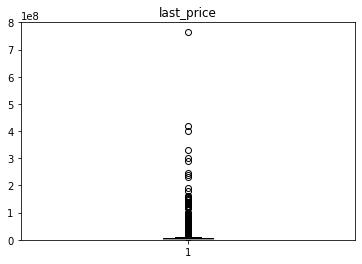

In [26]:
plt.boxplot(data['last_price'])#диаграмма размаха
plt.title('last_price')
plt.ylim(-100, 800000000)
display(data['last_price'].describe())#cписок значений
display(data.sort_values(by='last_price', ascending=False))# смотрю самые высокие значения цены 
data.shape

**Вывод** Получается, что cтандартное отклонение 1.090. Над верхним усом много выбросов. Попробую удалить то, что дороже 200млн.рублей.

In [27]:
data[(data['last_price'] > 200000000)].shape # смотрю сколько таких значений с ценой более 200млн.

(9, 22)

In [28]:
data2 = data[(data['last_price'] < 200000000)].reset_index()#срез и удаление
display(data.shape)#количество до удаления
data2.shape #после удаления

(23610, 22)

(23601, 23)

count    2.360100e+04
mean     6.406411e+06
std      7.905031e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      1.908700e+08
Name: last_price, dtype: float64

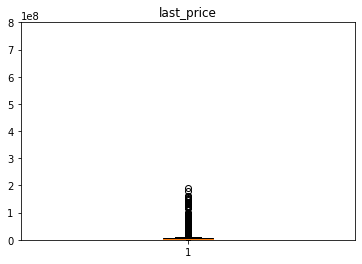

In [29]:
plt.boxplot(data2['last_price'])#диаграмма размаха
plt.title('last_price')
plt.ylim(-100, 800000000)
display(data2['last_price'].describe())#cписок значений

**Вывод** Было стандартное отклонение 1.090 стало после удалений 7.905 получается лучше этим я не сделала или надо было больше удалять значений?

count    23610.000000
mean        60.342992
std         35.650362
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,True,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.3,4,True,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,95
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5,145.0,5,True,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,95
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,True,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,True,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19558,2,1686000.0,13.2,2018-12-17,1,2.65,5,17.6,1,True,...,9.0,0,Санкт-Петербург,19891.0,4165.0,1,361.0,1,155.0,19
19807,0,3800000.0,13.0,2018-07-04,1,2.65,5,10.0,3,True,...,9.0,0,Санкт-Петербург,21302.0,1242.0,1,592.0,3,27.0,9
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5,17.6,2,False,...,9.0,0,Санкт-Петербург,24915.0,5483.0,1,644.0,0,NaN,24
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9,17.6,1,True,...,9.0,0,Санкт-Петербург,14350.0,15945.0,0,NaN,1,185.0,410


(23610, 22)

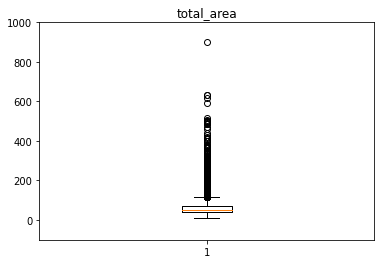

In [30]:
plt.boxplot(data['total_area'])#диаграмма размаха
plt.title('total_area')
plt.ylim(-100, 1000)
display(data['total_area'].describe())#cписок значений
display(data.sort_values(by='total_area', ascending=False))# смотрю самые большие значения площади 
data.shape

**Вывод** На первом боксплоте тоже выбросы, всё над верхним усом и стандартное отклонение вообще 35.65, размах большой от 12 до 900.

count    23610.000000
mean         2.071241
std          1.078403
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.60,2018-06-09,19,2.65,5,264.5,2,True,...,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114
18848,6,28500000.0,270.00,2015-03-02,16,3.00,4,180.0,4,True,...,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516.0,0,NaN,1365
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6,409.0,3,True,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14
866,5,25000000.0,363.00,2017-12-23,14,3.16,5,222.0,4,True,...,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418
20829,6,28659000.0,245.40,2016-03-31,14,2.65,4,168.3,2,True,...,25.9,0,Санкт-Петербург,21104.0,2054.0,3,541.0,2,118.0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,14,2300000.0,29.00,2018-03-29,0,2.60,26,22.0,9,True,...,0.0,2,поселок городского типа имени Свердлова,NaN,NaN,0,NaN,0,NaN,115
12412,0,3300000.0,27.00,2017-08-15,0,2.65,25,25.0,22,True,...,0.0,0,Санкт-Петербург,12199.0,12111.0,0,NaN,1,337.0,161
20002,8,2700000.0,28.00,2017-11-10,0,2.65,21,20.0,6,True,...,0.0,2,Санкт-Петербург,21460.0,16788.0,0,NaN,1,170.0,17
17695,7,2550000.0,24.00,2017-12-16,0,2.65,23,17.0,8,True,...,0.0,1,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,38


(23610, 22)

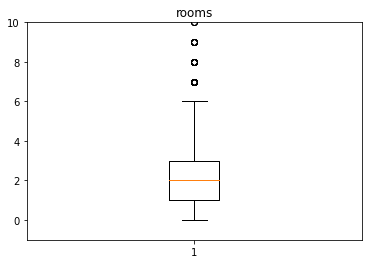

In [31]:
plt.boxplot(data['rooms'])#диаграмма размаха
plt.title('rooms')
plt.ylim(-1, 10)
display(data['rooms'].describe())#cписок значений
display(data.sort_values(by='rooms', ascending=False))# смотрю самые большие значения  
data.shape

In [32]:
data[(data['rooms'] <=0) & (data['rooms'] >6)].shape #смотрю сколько таких квартир

(0, 22)

In [33]:
data3 = data[(data['rooms'] <6)].reset_index()#срез и удаление
display(data.shape)#количество до
data3.shape#количество после

(23610, 22)

(23416, 23)

count    23416.000000
mean         2.030876
std          0.973593
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

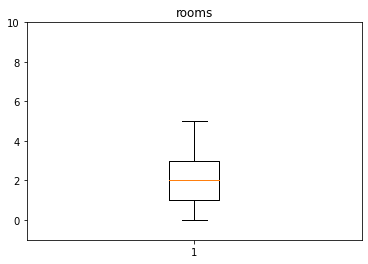

In [34]:
plt.boxplot(data3['rooms'])#диаграмма размаха повторно
plt.title('rooms')
plt.ylim(-1, 10)
data3['rooms'].describe()#cписок значений

**Выводы** Тоже есть выбросы, размах большой, от нуля до 19 квартир и стандартное отклонение 1.078. Удалила квартиры с 6 и более комнатами. Стандартное отклонение уменьшилось до 0.97. По видно, что выбросов не стало.

### Посчитайте и добавьте в таблицу новые столбцы

**Добавление в таблицу нового столбца с параметрами - Цена одного квадратного метра.**

In [35]:
data['price_one_metr'] = data['last_price'] / data['total_area']# цена одного метра равна отношению цены к общей площади квартиры
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000


**Добавление в таблицу нового столбца - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).**

In [36]:
data['day_week_exposition'] = data['first_day_exposition'].dt.weekday #в новый столбец добавляю номер дня в неделе
data.head() #проверяю как выглядит новый столбец

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,day_week_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,True,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1


**Добавление в таблицу нового столбца - Месяц публикации объявления.**

In [37]:
data['month_exposition'] = data['first_day_exposition'].dt.month #в новый столбец month_exposition добавляю месяц
data.head() #проверяю изменения 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,day_week_exposition,month_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,18863.0,16028.0,1,482.0,2,755.0,95,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,True,...,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6


**Добавление в таблицу нового столбца - год публикации объявления.**

In [38]:
data['year_exposition'] = data['first_day_exposition'].dt.year #в новый столбец year_exposition добавляю год
data.head() #проверяю изменения 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,day_week_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,16028.0,1,482.0,2,755.0,95,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,True,...,6800.0,2,84.0,3,234.0,424,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018


**Добавление в таблицу нового столбца - тип этажа квартиры (значения — «первый», «последний», «другой»).**

In [39]:
data['type_floor'] = np.where(data['floor'] == 1,'Первый', np.where(data['floor'] == data['floors_total'], 'Последний', 'Другой'))#добавляю в новый столбец данные через использование библиотеки numpy и метода where
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,day_week_exposition,month_exposition,year_exposition,type_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,1,482.0,2,755.0,95,120370.370370,3,3,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0,NaN,0,NaN,81,82920.792079,1,12,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,1,90.0,2,574.0,558,92785.714286,3,8,2015,Другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,True,...,2,84.0,3,234.0,424,408176.100629,4,7,2015,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,2,112.0,1,48.0,121,100000.000000,1,6,2018,Другой


**Добавление в таблицу нового столбца - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).**

In [40]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000) #перевожу метры в километры и округляю
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metr,day_week_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2,755.0,95,120370.370370,3,3,2019,Другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,0,NaN,81,82920.792079,1,12,2018,Первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,90.0,2,574.0,558,92785.714286,3,8,2015,Другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,True,...,84.0,3,234.0,424,408176.100629,4,7,2015,Другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1,48.0,121,100000.000000,1,6,2018,Другой,8.0


**Вывод** Новые столбцы добавлены в таблицу, всё необходимое - посчитано.

### Проведите исследовательский анализ данных

**Изучим следующие параметры объектов**

Общая площадь квартиры

<AxesSubplot:ylabel='Frequency'>

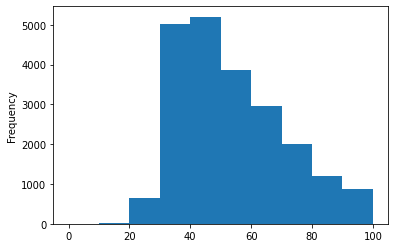

In [41]:
data['total_area'].plot(kind='hist', bins=10, range=(0,100))

**Вывод** Добавила range чтобы было лучше и ближе было видно показатели. Больше всего квартир площадью от 40 до 50 кв.м. (чуть больше 5000), 5000 объявлений с квартириами 30-40кв.м. 4 тысячи объявлений квартир с площадью 50-60 кв.м. 3 тысячи квартир с площадью 60-70 кв.м, 2 тысячи квартир 70-80кв.м., и около 2 тысяч квартир продается с общей площадью от 80 до 100 кв.м.  Чем больше площадь квартиры, тем меньше таких квартир продается.

Жилая площадь

<AxesSubplot:ylabel='Frequency'>

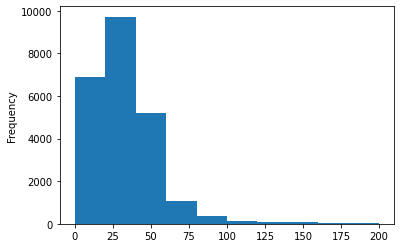

In [42]:
data['living_area'].plot(kind='hist', bins=10, range=(0,200))

**Вывод** По графику видно, что больше всего квартир с жилой площадью 25-40 кв.м. почти 10 000 объявлений, квартир с жилой площадью в 40-60кв.м в половину меньше, около 5 000. Жилая площадь до 25кв.м. у 7 тысяч квартир. Видна зависимость, чем больше жилая площадь квартиры, тем меньше таких квартир продается.

Площадь кухни

<AxesSubplot:ylabel='Frequency'>

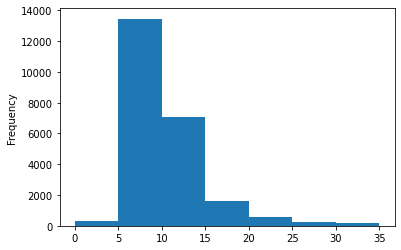

In [43]:
data['kitchen_area'].plot(kind='hist', bins=7, range=(0,35))

**Вывод** У большого количества объявлений (14тысяч) квартиры с площадью кухни 5 - 10 кв.м., у большинства обычных квартир так и есть. E 7000 квартир кухни 10-15 метров. Далее видна зависимость, чем больше площадь кухни у квартиры, тем меньше таких квартир продается.

Цена объекта

<AxesSubplot:ylabel='Frequency'>

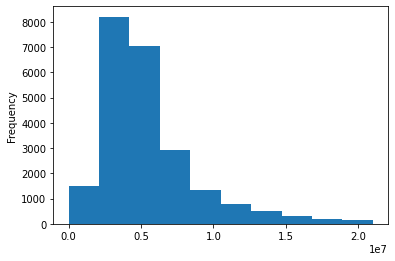

In [44]:
data['last_price'].plot(kind='hist', bins=10, range=(0,21000000))

**Вывод** При проверке аномалий была цифра в данном столбце в 21млн, поэтому в range решила добавить это значение. По гистограмме видео, что большее количество квартир (8 тысяч и 7 тысяч) продается за цену от 2,5млн до 6.5млн.рублей, до 2,5 млн квартир очень мало - всего 1500. Далее прослеживается зависимость, чем выше цена за квартиру, тем меньше объявлений о продаже.

Количество комнат

<AxesSubplot:ylabel='Frequency'>

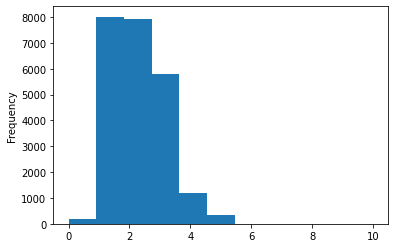

In [45]:
data3['rooms'].plot(kind='hist', bins=11, range=(0,10))

**Вывод** Больше всего продается однокомнатных квартир (8000 объявлений), почти столько же двушек. Трехкомнатных по меньше - 6000 объявлений. Четырехкомнатных квартир всего 1000 объявлений, далее предложений о продаже все меньше и меньше. Потому что немногим людям нужно и подсилу иметь квартиру с 5 и более комнатами.

Высота потолков

<AxesSubplot:ylabel='Frequency'>

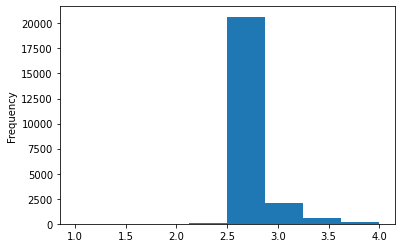

In [46]:
data['ceiling_height'].plot(kind='hist', bins=8, range=(1,4))

**Вывод** Видно, что большинство квартир с потолками от 2,5 метром (20 000 объявлений), с потолком в 3 метра всего 2500 объявлений.

Этаж квартиры

<AxesSubplot:ylabel='Frequency'>

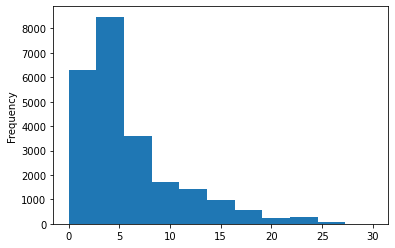

In [47]:
data['floor'].plot(kind='hist', bins=11, range=(0,30))

**Вывод** Большинство квартир (8 500) продается выше второго этажа и до 7го. У 6200 квартир 1-2 этаж. 3500 квартир с этажами 6-9. Далее чем выше этаж, тем меньше квартир продается.

Тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:>

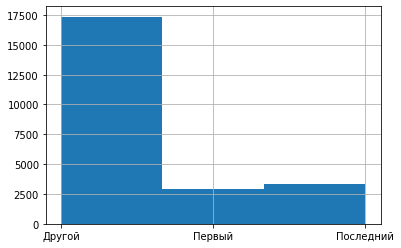

In [48]:
data['type_floor'].hist(bins=3)

**Вывод** По гистограмме видно, что самыми не популярными являются квартиры на первом и последнем этаже 2500 и 3500 квартир. 17500 объявлений с продажей квартиры на других этажах.

Общее количество этажей в доме

<AxesSubplot:ylabel='Frequency'>

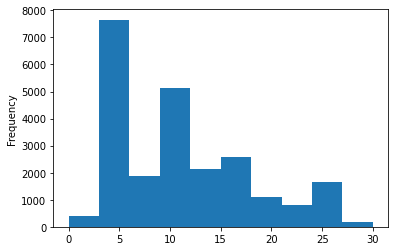

In [49]:
data['floors_total'].plot(kind='hist', bins=10, range=(0,30))

**Вывод** Почти 8тыс объявлений с квартирами в трех-пяти этажных домах, 5тыс квартир продаются в 9ти-12ти этажных домах, менее популярные дома с 6-9 этажами (5000 квартир), 13-ти этажные дома и более высокие дома тоже не особо популярны.

Расстояние до центра города в метрах

<AxesSubplot:ylabel='Frequency'>

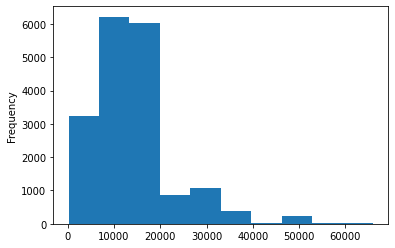

In [50]:
data['cityCenters_nearest'].plot(kind='hist')

**Вывод** Чуть больше 6тыс квартир находятся на расстоянии от центра города от 6км до 15000, 6000 объявлений квартир на расстоянии от 15 до20км, дальше чем больше расстояние, тем меньшее количество квартир продается, меньше 1 тысячи.

Расстояние до ближайшего аэропорта

<AxesSubplot:ylabel='Frequency'>

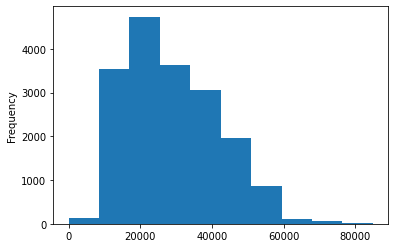

In [51]:
data['airports_nearest'].plot(kind='hist')

**Вывод** По гистограмме видно, что большинство квартир (почти 5тысяч) находятся в 20км от аэропорта, по 3500 квартир на расстоянии от 10км до 20км и  25-35км от аэропорта, далее чем дальше от аэропорта, тем меньше квартир продается.

Расстояние до ближайшего парка

<AxesSubplot:ylabel='Frequency'>

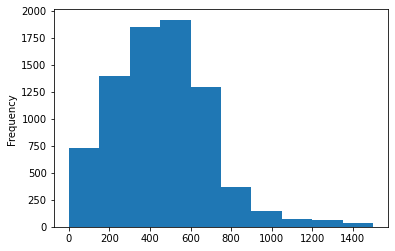

In [52]:
data['parks_nearest'].plot(kind='hist', bins=10, range=(0,1500))

**Вывод** Почти 4тыс квартир находятся на расстоянии 300-600метром до ближайшего парка это очень близко, такие квартиры чаще продаются, у 1400 квартир парк в 200 метрах, а у 1250 квартир парк в 600-800 метрах.

День и месяц публикации объявления

<AxesSubplot:ylabel='Frequency'>

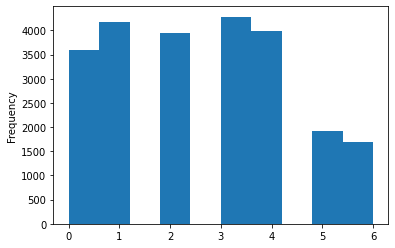

In [53]:
data['day_week_exposition'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

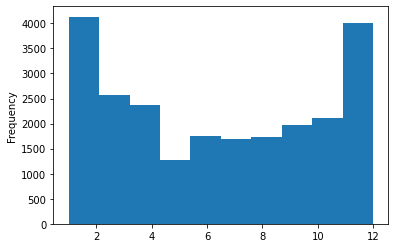

In [54]:
data['month_exposition'].plot(kind='hist')

**Вывод** Здесь видно, что больше всего публикуется объявлений о продаже квартир в будние дни, в выходные дни значительно меньше 20000 в будни и 8000 в выходные - меньше 4000. По месяцам - самые популярные месяца для публикации объявлений оказались декабрь и январь, по 4тысячи объявлений, чуть меньше около 2500 объявлений в месяца: февраль, март, апрель. Самый низкий показатель май, возможно из-за большого количества майских праздников, лето - практически стабильно около 1500 объявлений в каждый месяц, осенью начинается постепенное увеличение объявлений о продаже квартир.

Как быстро продавались квартиры

<AxesSubplot:ylabel='Frequency'>

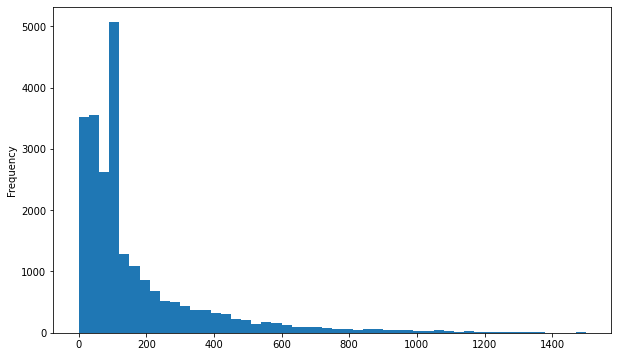

In [55]:
data['days_exposition'].plot(kind='hist', bins=50, figsize=(10,6), range=(0,1500))

Самое большое количество квартир, 5 тысяч продали в течении 75-100 дней, по 3500 квартир продали за 25-50 дней, меньше квартир (2500) продали в течении срока 50-75 дней, далее 1200 квартир продали за 100-125 дней, далее чем дольше срок продажи, тем меньше объявлений. 


In [56]:
data['days_exposition'].mean(), data['days_exposition'].median() #считаю среднее и медиану


(169.34930114358323, 95.0)

**Выводы** Получается, что 95 дней это медианное значение. В этом столбце достаточно большой разброс данных. Если квартиру продали в течении первого месяца это можно считать быстрой продажей, а вот 169 дней это долгая продажа.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**


Изучим зависит ли цена от общей площади

0.6536360648200396

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

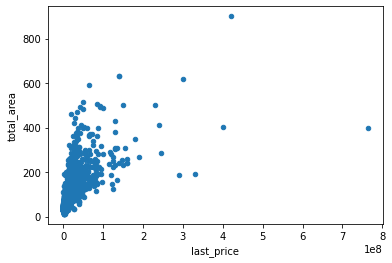

In [57]:
display(data['last_price'].corr(data['total_area']))#коффициент корреляции Пирсона
data.plot(x='last_price', y='total_area', kind='scatter')#диаграмма рассеивания

**Вывод** Использовала коффициент Пирсона и диаграмму рассеивания для оценки взаимосвязи. Коффициент равен 0.65, это ближе к единице, чем к нулю, зависимость цены от общей площади существует, но не сильная.

Посмотрим зависимость цены от жилой площади

0.5560636145195025

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

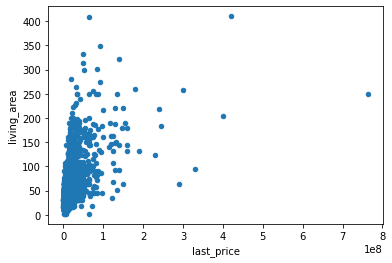

In [58]:
display(data['last_price'].corr(data['living_area']))#коффициент корреляции Пирсона
data.plot(x='last_price', y='living_area', kind='scatter')#диаграмма рассеивания

**Вывод** Засисимость цены от жилой площади квартиры меньше, чем зависимость цены от общей площади квартиры, всего 0.56. Скорее всего потому что при продаже/поиске квартиры, чаще всего фигурирует общая площадь квартиры.

Посмотрим зависимость цены от площади кухни

0.45153553442317973

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

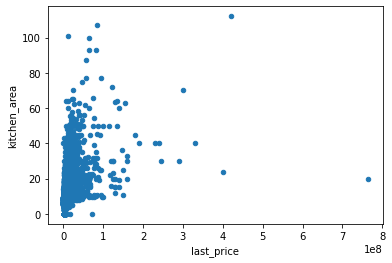

In [59]:
display(data['last_price'].corr(data['kitchen_area']))#коффициент корреляции Пирсона
data.plot(x='last_price', y='kitchen_area', kind='scatter')#диаграмма рассеивания

**Вывод** Еще меньше зависимость цены от площади кухни, всего 0.45. Такая зависимость ближе к нулю, чем к единице, поэтому можно сказать, что её практически нет.

Посмотрим зависимость цены от количества комнат

0.006130211810965086

<AxesSubplot:xlabel='rooms'>

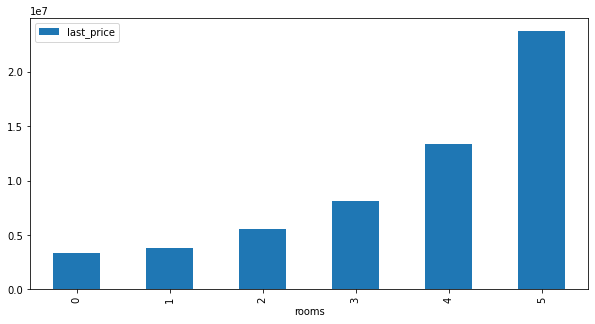

In [60]:
display(data['last_price'].corr(data3['rooms']))#коффициент корреляции Пирсона
#data.plot(x='last_price', y='rooms', kind='scatter')#диаграмма рассеивания
price_rooms = data3.pivot_table(index='rooms', values='last_price')#сводная таблица
price_rooms.plot(y='last_price', kind='bar', figsize=(10,5))#столбчатый график

**Вывод** Здесь зависимость еще меньше, 0.06. На стоимость квартиры количество комнат не особо влияет получается. Но видно, что цена выше с увеличением количества комнат.

Посмотрим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

<AxesSubplot:xlabel='floor'>

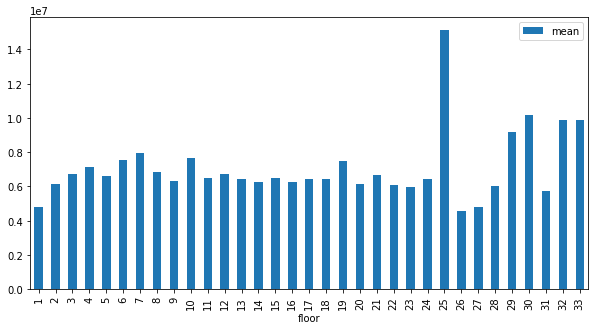

In [61]:
price_floor = data.pivot_table(index='floor', values='last_price', aggfunc={'count', 'mean'})#сводная таблица
price_floor.plot(y='mean', kind='bar', figsize=(10,5))# столбчатый график

**Вывод** Самая низкая цена на квартиры на первом этаже, 26 и 27, цены повыше на квартиры на высоких этажах, у остальных этажей цена примерно одинаковая.

Посмотрим зависимость цены от даты размещения (день недели, месяц, год)

<AxesSubplot:xlabel='day_week_exposition'>

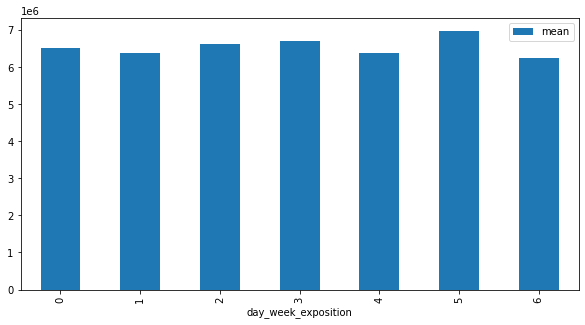

In [62]:
price_day_week_exposition = data.pivot_table(index='day_week_exposition', values='last_price', aggfunc={'count', 'mean'})#сводная таблица
price_day_week_exposition.plot(y='mean', kind='bar', figsize=(10,5))# столбчатый график

**Вывод** Самая высокая цена в субботу, большой зависимости цены от даты размещения нет.

<AxesSubplot:xlabel='month_exposition'>

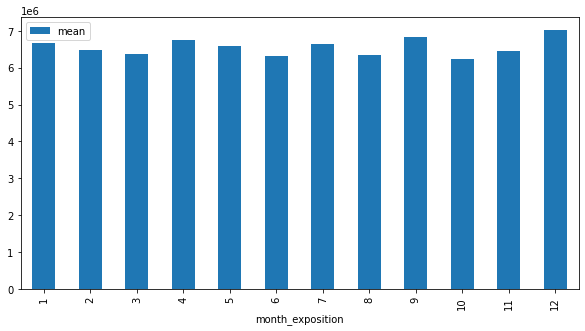

In [63]:
price_month_exposition = data.pivot_table(index='month_exposition', values='last_price', aggfunc={'count', 'mean'})#сводная таблица
price_month_exposition.plot(y='mean', kind='bar', figsize=(10,5))# столбчатый график

**Вывод** Зависимость цены от месяца публикации по средним показателям не наблюдается.

<AxesSubplot:xlabel='year_exposition'>

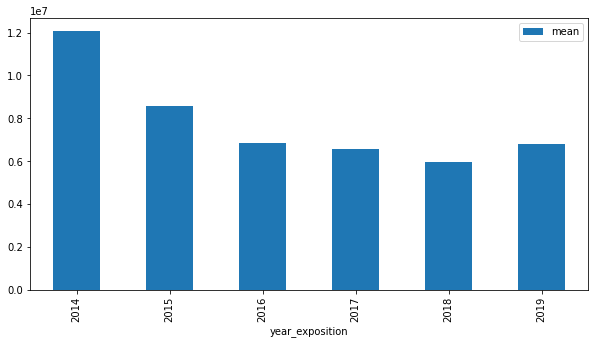

In [64]:
price_year_exposition = data.pivot_table(index='year_exposition', values='last_price', aggfunc={'count', 'mean'})#сводная таблица
price_year_exposition.plot(y='mean', kind='bar', figsize=(10,5))# столбчатый график

**Вывод** В 2014 году был подъем цен, далее шел спад до 2019. В 2019 году цена немного выросла.  

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [65]:
mean_price_onemetr = data.pivot_table(index='locality_name', values='price_one_metr', aggfunc={'mean', 'count'})#сводная таблица по населенным пунктам с расчетом средней цены одного квадратного метра
mean_price_onemetr = mean_price_onemetr.sort_values(by='count', ascending=False)#сортировка по убыванию
mean_price_onemetr.head(10)

,count,mean
locality_name,,
Санкт-Петербург,15648,114838.684222
поселок Мурино,552,85629.568678
поселок Шушары,439,78551.344545
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
поселок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."

In [66]:
max_mean_price_onemetr = mean_price_onemetr.sort_values(by='mean', ascending=False)#сортировка по убыванию
max_mean_price_onemetr.head(1)

,count,mean
locality_name,,
Зеленогорск,24,115122.799198


**Вывод** Самая высокая стоимость за квадратный метр в Зеленогорске. 

In [67]:
min_mean_price_onemetr = mean_price_onemetr.sort_values(by='mean', ascending=True)
min_mean_price_onemetr.head(1)

,count,mean
locality_name,,
деревня Старополье,3,11206.221198


**Вывод** Самая низкая стоимость квадратного метра в деревне Старополье.

Выделим квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра.


,mean,mean_price
cityCenters_nearest_km,,
0.0,3.144912e+07,31.449116
1.0,2.120672e+07,21.206721
2.0,1.778832e+07,17.788320
3.0,1.113739e+07,11.137395
4.0,1.330428e+07,13.304280
5.0,1.445600e+07,14.455996
6.0,1.533842e+07,15.338418
7.0,1.477515e+07,14.775153
8.0,9.940594e+06,9.940594


<AxesSubplot:xlabel='cityCenters_nearest_km'>

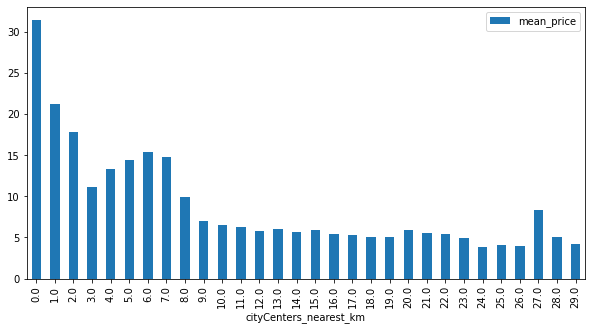

In [68]:
mean_price_km_v_spb = data.loc[data['locality_name']=='Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc={'mean'})# выделение квартир в СПб, сводная таблица для вычисления средней цены каждого километра
mean_price_km_v_spb['mean_price'] = mean_price_km_v_spb['mean']/1000000 #для наглядности поделила на 1млн
display(mean_price_km_v_spb)
mean_price_km_v_spb.plot(y='mean_price', kind='bar', figsize=(10,5))# столбчатый график

**Вывод** По таблице видно, что стоимость квартиры напрямую зависит от расстояния до центра города. Цена километра в центре СПб 31.45, а в 29 километрах от центра - цена километра всего 4.24. В центре города хорошо развитая инфраструктура, все удобства для жизни, работы и развития. В более отдаленных территориях такого нет. Большая разница в цене видна невооруженным взглядом.

### Общий вывод

1. Самое большое количество объявлений о продаже квартир (чуть больше 5 тысяч объявлений) с общей площадью от 40 до 50 кв.м. 5000 квартир с площадью 30-40 кв.м., далее идет снижение, чем больше площадь, тем меньше таких объявлений о продаже квартир - 4000 обявлений с квартирами 50-60кв.м., 3000 - 60-70кв.м., 2000 - 70-80кв.м., 2000 - 80-100кв.м. Из них 10 000 квартир с жилой площадью 40-60кв.м., 7 000 квартир с жилой площадью до 25 кв.м., далее прослеживается зависимость, чем больше жилая площадь, тем меньше таких квартир продается. 

2. Самая распространенная площадь кухни (у 14 тысяч квартир) это 5-10 кв.м., у 7000 квартир кухня 10-15 кв.м. Большая кухня это предмет роскоши, поэтому чем больше кухня, тем меньше таких квартир продается и они конечно стоят дороже. 15 тысяч квартир продается за цену от 2,5млн до 6.5млн.рублей. Самые дешевые квартиры до 2.5 млн всего 1000 объявлений, далее чем выше цена за квартиру, тем меньше предложений на рынке недвижимости. 16 тысяч квартир пополам это однокомнатные и двухкомнатные, всего 6000 оъявлений с трехкомнатными квартирами, четырехкомнатных всего 1000. 

3. 20 000 квартир с высотой потолков 2.5 - 2.7 метров. У 3000 квартир потолки в 3 метра высотой. У 8500 квартир этаж с 3 до 7,  у 6200 квартир первые 1-2 этаж, у 3500 этаж 6-9, далее чем выше этаж, тем меньше объявлений о продаже квартир. Самыми не популярными этажами оказались первый и последний. 

4. Большинство продаваемых квартир в 3х,4х и 5пятииэтижных домах около 8000. Менее популярные квартиры в 6-9тиэтажных домах - 5000 квартир. Почти 12 000 квартир находятся на растоянии 9-20км от центра города, далее чем дальше, тем меньше предложений о продаже квартир. Все квартиры находятся на расстоянии от аэропорта менее, чем в 60км.

5. Больше всего квартир продается в будние дни, в выходные дни значительно меньше. По месяцам - самые распространенные оказались декабрь и январь, по 4тысячи объявлений, чуть меньше около 2500 объявлений в месяца: февраль, март, апрель. Самый низкий показатель май, возможно из-за большого количества майских праздников, лето - практически стабильно около 1500 объявлений в каждый месяц, осенью начинается постепенное увеличение объявлений о продаже квартир. Чаще всего объявления о продаже квартиры публикуются в будние дни, самыми популярными месяцами стали декабрь и январь. В среднем продажа квартиры занимает 95 дней, быстрой продажей считается срок в 1 месяц, долгой - 169 дней.

6. На стоимость квартиры влияет общая и жилая площадь, этаж продаваемой квартиры, площадь кухни. Цена не зависит от дня публикации объявления и месяца публикации, в 2014 году был подъем цен на квартиры, далее спад, до 2019 года. Самая высокая стоимость за квадратный метр в Зеленогорске. 
 
7. Самая низкая стоимость квадратного метра в деревне Старополье. Стоимость квартиры напрямую зависит от расстояния до центра города. Цена километра в центре СПб 31.45, а в 29 километрах от центра - цена километра всего 4.24. В центре города хорошо развитая инфраструктура, все удобства для жизни, работы и развития. В более отдаленных территориях от крупного города таких возможностей меньше.